In [1]:
import math
import random
import matplotlib.pyplot as plt
import import_ipynb
import Utilities
from Points_Generator import NodeGenerator

class SimulatedAnnealing:
    def __init__(self, coords, temp, alpha, stopping_temp, stopping_iter):
        ''' Params
        
            coords:         2D array 
                            containing X, Y coordinates of points to traverse
            temp:           float
                            initial temperature
            alpha:          float
                            rate at which temp decreases
            stopping_temp:  float
                            temerature at which annealing process terminates
            stopping_iter:  int
                            interation at which annealing process terminates
                            
        '''

        self.coords = coords
        self.sample_size = len(coords)
        self.temp = temp
        self.alpha = alpha
        self.stopping_temp = stopping_temp
        self.stopping_iter = stopping_iter
        self.iteration = 1

        self.dist_matrix = Utilities.CreateDistanceMatrix(coords)
        self.curr_solution = Utilities.nearestNeighbourSolution(self.dist_matrix)
        self.best_solution = self.curr_solution

        self.solution_history = [self.curr_solution]

        self.curr_weight = self.weight(self.curr_solution)
        self.initial_weight = self.curr_weight
        self.min_weight = self.curr_weight

        self.weight_list = [self.curr_weight]

        print('Intial weight: ', self.curr_weight)

    def weight(self, sol):
        '''
        Calcuate weight defined as total distance traversed in one closed loop
        '''
        return sum([self.dist_matrix[i, j] for i, j in zip(sol, sol[1:] + [sol[0]])])

    def acceptance_probability(self, candidate_weight):
        
        return math.exp(-abs(candidate_weight - self.curr_weight) / self.temp)

    def accept(self, candidate):
        '''
        Accept with probability 1 if candidate solution is better than
        current solution, else accept with probability equal to the
        acceptance_probability()
        
        '''
        candidate_weight = self.weight(candidate)
        if candidate_weight < self.curr_weight:
            self.curr_weight = candidate_weight
            self.curr_solution = candidate
            if candidate_weight < self.min_weight:
                self.min_weight = candidate_weight
                self.best_solution = candidate

        else:
            if random.random() < self.acceptance_probability(candidate_weight):
                self.curr_weight = candidate_weight
                self.curr_solution = candidate

    def anneal(self):
        '''
        2-opt criterion for local search has been employed
        
        '''
        
        while self.temp >= self.stopping_temp and self.iteration < self.stopping_iter:
            candidate = list(self.curr_solution)
            l = random.randint(2, self.sample_size - 1)
            i = random.randint(0, self.sample_size - l)

            candidate[i: (i + l)] = reversed(candidate[i: (i + l)])

            self.accept(candidate)
            self.temp *= self.alpha
            self.iteration += 1
            self.weight_list.append(self.curr_weight)
            self.solution_history.append(self.curr_solution)

        print('Minimum weight: ', self.min_weight)
        print('Improvement: ',
              round((self.initial_weight - self.min_weight) / (self.initial_weight), 4) * 100, '%')
        print("Traverse the cities in folowing order "+"\n")
        print(' --> '.join(['City'+str(i) for i in self.best_solution]))
        print("\n")

    def animateSolutions(self):
        animated_visualizer.animateTSP(self.solution_history, self.coords)

    def plotLearning(self):
        plt.plot([i for i in range(len(self.weight_list))], self.weight_list)
        line_init = plt.axhline(y=self.initial_weight, color='r', linestyle='--')
        line_min = plt.axhline(y=self.min_weight, color='g', linestyle='--')
        plt.legend([line_init, line_min], ['Initial weight', 'Optimized weight'])
        plt.ylabel('Weight')
        plt.xlabel('Iteration')
        plt.show()

importing Jupyter notebook from Utilities.ipynb
importing Jupyter notebook from Points_Generator.ipynb


Acceptance Probability is defined as $$\mathbb{P}(accept) = \exp\left ( -\left | \frac{Weight(current) - Weight(candidate)}{Temperature} \right | \right )$$

The metaheuristic employed here is as follows: 

1. From the current solution, obtain the candidate solution using a 2-opt criteria for local search
2. If the candidate solution has lower weight than current solution then accept the canddate solution with Probability 1
3. If the candidate solution has higher weight than current solution then accept the canddate solution with Probability 
$\mathbb{P}(accept)$
4. In the later stages of the algorithm, cooling factor has reduced the temperature of the system thereby reducing $\mathbb{P}(accept)$ so that it becomes harder to accept candidates with weights worse than current solution
5. However, in the early stages of the algorithm, $\mathbb{P}(accept)$ causes the Algorithm to search for solutions with weights higher than current solution thereby exploring the solution space for global optima 


Please refer to the following link for 2-opt criteria illustration --> https://en.wikipedia.org/wiki/2-opt <br>
Please refer to the following link for illustration of SA Algorithm --> https://en.wikipedia.org/wiki/Simulated_annealing

Intial weight:  3679.6295383778315
Minimum weight:  3156.130505834651
Improvement:  14.23 %
Traverse the cities in folowing order 

City115 --> City40 --> City134 --> City117 --> City148 --> City68 --> City65 --> City118 --> City45 --> City59 --> City15 --> City64 --> City9 --> City39 --> City12 --> City85 --> City113 --> City104 --> City122 --> City56 --> City111 --> City127 --> City14 --> City147 --> City142 --> City18 --> City79 --> City100 --> City108 --> City31 --> City77 --> City62 --> City110 --> City42 --> City101 --> City109 --> City125 --> City84 --> City103 --> City32 --> City34 --> City71 --> City80 --> City121 --> City130 --> City91 --> City19 --> City97 --> City146 --> City123 --> City41 --> City48 --> City28 --> City92 --> City16 --> City128 --> City102 --> City149 --> City27 --> City99 --> City47 --> City36 --> City33 --> City26 --> City83 --> City21 --> City61 --> City120 --> City112 --> City50 --> City0 --> City37 --> City51 --> City131 --> City43 --> City96 --> City7

<IPython.core.display.Javascript object>


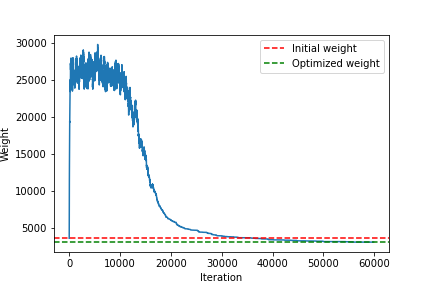

In [6]:
if __name__=="__main__":
    coordinates = NodeGenerator(width=200, height= 450 , nodesNumber= 150).generate()
    temperature = 100000
    stoppingtemperature = 0.00000001
    alpha = 0.9995
    stopping_iter = 1000000
    SA = SimulatedAnnealing(coordinates, temperature, alpha, stoppingtemperature, stopping_iter)
    SA.anneal()
    SA.plotLearning()